In [6]:
# import module for reading LHE files:
from LHEReader import *

###########################################################
# Handle the input here. 
# The default output file tag (i.e. extension) is 'output'.
###########################################################


# the input file names:
inputfile = 'mumu_eta0mumu.lhe'

# output filename tag
outputfiletag = ''

Reading mumu_eta0mumu.lhe


10000it [00:00, 734811.49it/s]

---
plotting pt
saving the figure
output in pt.pdf


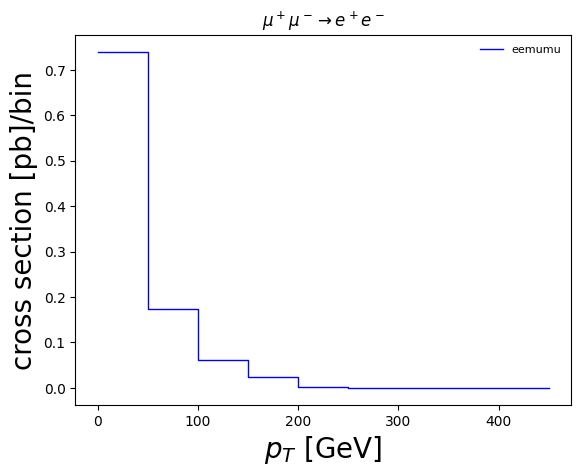

In [7]:
############################################################
# Define your ANALYSIS function here!
# The example looks for the new particle with pdg id "99925"
# and calculates its transverse momentum.
# For each observable we wish to return, we must add it to
# the dictionary "output_dictionary" as in the example below.
#############################################################
def analyze(events, weights):
    # a dictionary that contains the arrays that we wish to plot
    output_dictionary = {}
    # construct the observables by putting emtpy arrays into the dictionary:
    output_dictionary['costheta'] = []
    output_dictionary['pt'] = []

    # loop over the particles in the event:
    for iev, particles in tqdm(enumerate(events)):
        for p in particles:
            if abs(p[0])==13:
                costheta = p[4]/math.sqrt(p[2]**2 + p[3]**2 + p[4]**2)
                output_dictionary['costheta'].append(costheta)
                pt = math.sqrt(p[2]**2 + p[3]**2)
                output_dictionary['pt'].append(pt)
    return output_dictionary

#######################################
# PERFORM THE ANALYSIS AND PLOT HERE:
#######################################

# read the LHE File
print('Reading', inputfile)
events, weights, multiweights = readlhefile(inputfile)
# analyze the events by passing them to the analysis fuinction defined above
output = analyze(events, weights)

# set the cross section:
CrossSection = [1.0]

# plot all the variables in the output dictionary. 
# here as an example we are plotting the heavy scalar pT.
# Note that "histogram_multi" takes as input in DATA_array an array of data points,
# hence the extra [] there and in the plotnames_multi
histogram_multi_xsec([output['pt']], CrossSection, 'pt', ['eemumu'], r'$p_T$ [GeV]', title=r'$\mu^+\mu^- \rightarrow \mu^+ \mu^-$', ylabel='cross section [pb]/bin', custom_bins=np.arange(0,500, 50))